# Task for evaluating EDA skills
* Import pandas
* Put HospitalAdmissionsData into a dataframe: https://umich.instructure.com/courses/38100/files/folder/Case_Studies/18_HospitalAdmissions?preview=5005926
* Answer the following:
    * What are the column headers or features in this data set?
    * How many features are floats? how many are integers? 
    * Which features are objects (non-numeric variables)?
    * What are the possible 'values' for features that are objects?
    * Show the summary statistics for the numerical data
    * What is the most common admission type, insurance type, religion type, race, and diagnosis (Dx)?
    * Show a histogram for admission days (with appropriate labels, titles, etc), and also show a histogram for admission days on a log scale. Describe what you see.
    * Compare the average length of admission between those who died versus those who did not die. Show a visualization, with appropriate labels, titles, etc.
    * Describe the association between death and insurance type and show a visualization or test.

In [1]:
import pandas as pd

In [2]:
filepath = "C:/Users/janes/Documents/MDST/MDST Resources/HospitalAdmissionsData.csv"
df = pd.read_csv(filepath)

In [3]:
df.head()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
0,42862,4.277778,0,elective,private,1,episcopalian,1,white,mitral stenosis\mitral valve replacement /sda
1,5967,26.122917,0,elective,private,0,catholic,1,white,duodenal mass/sda
2,50952,7.028472,1,emergency,medicare,1,catholic,0,asian - japanese,? serotonin syndrome
3,17138,34.187500,0,elective,medicare,1,catholic,1,white,abdominal aortic aneurysm/sda
4,27703,6.165972,0,elective,government,0,protestant quaker,0,black/african american,absence/sda


In [4]:
df.tail()

,ID,AdmissionLengthDays,Death_1,Admission_Type,Insurance_Type,EnglishLanguage_1,Religion_Type,Married_1,Race,Dx
58858,42349,12.177083,0,elective,medicare,1,catholic,1,white,zenker's diverticulum/sda
58859,57461,10.613889,0,elective,medicare,1,catholic,0,white,zenker's diverticulum/sda
58860,11800,1.095139,0,emergency,private,0,unobtainable,0,white,zone 2 neck injury
58861,54574,2.925000,0,emergency,medicare,1,not specified,0,black/african american,zoster vs. meningitis
58862,29394,2.851389,0,emergency,private,1,unobtainable,0,white,zygomatic fracture left


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58863 entries, 0 to 58862
Data columns (total 10 columns):
ID                     58863 non-null int64
AdmissionLengthDays    58863 non-null float64
Death_1                58863 non-null int64
Admission_Type         58863 non-null object
Insurance_Type         58863 non-null object
EnglishLanguage_1      58863 non-null int64
Religion_Type          58408 non-null object
Married_1              58863 non-null int64
Race                   58863 non-null object
Dx                     58863 non-null object
dtypes: float64(1), int64(4), object(5)
memory usage: 4.5+ MB


In [6]:
df.describe()

,ID,AdmissionLengthDays,Death_1,EnglishLanguage_1,Married_1
count,58863.000000,58863.000000,58863.000000,58863.000000,58863.000000
mean,29508.211984,10.138978,0.099417,0.571072,0.410665
std,17026.189024,12.465611,0.299224,0.494927,0.491959
min,1.000000,-0.945139,0.000000,0.000000,0.000000
25%,14762.500000,3.743056,0.000000,0.000000,0.000000
50%,29523.000000,6.465972,0.000000,1.000000,0.000000
75%,44254.500000,11.798264,0.000000,1.000000,1.000000
max,58976.000000,294.660417,1.000000,1.000000,1.000000


In [7]:
df.describe(include='object')

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
count,58863,58863,58408,58863,58863
unique,4,5,20,41,15647
top,emergency,medicare,catholic,white,newborn
freq,41987,28157,20561,40927,7823


In [8]:
df.Admission_Type.unique()

array(['elective', 'emergency', 'urgent', 'newborn'], dtype=object)

In [9]:
df.Insurance_Type.unique()

array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [10]:
df.Religion_Type.unique()

array(['episcopalian', 'catholic', 'protestant quaker',
       'christian scientist', 'other', 'jewish', 'not specified',
       'unobtainable', 'greek orthodox', 'buddhist', nan, 'baptist',
       "jehovah's witness", 'unitarian-universalist', 'muslim',
       'romanian east. orth', '7th day adventist', 'methodist', 'hindu',
       'hebrew', 'lutheran'], dtype=object)

In [11]:
df.Race.unique()

array(['white', 'asian - japanese', 'black/african american',
       'unknown/not specified', 'asian', 'hispanic or latino',
       'unable to obtain', 'other', 'patient declined to answer',
       'asian - cambodian', 'asian - asian indian',
       'hispanic/latino - dominican', 'black/haitian',
       'native hawaiian or other pacific islander',
       'hispanic/latino - puerto rican', 'white - russian',
       'white - other european', 'asian - chinese', 'asian - korean',
       'multi race ethnicity', 'hispanic/latino - colombian',
       'black/cape verdean', 'asian - filipino', 'asian - vietnamese',
       'portuguese', 'hispanic/latino - cuban', 'black/african',
       'hispanic/latino - guatemalan', 'white - brazilian',
       'middle eastern', 'white - eastern european', 'south american',
       'hispanic/latino - mexican', 'hispanic/latino - salvadoran',
       'asian - other', 'hispanic/latino - central american (other)',
       'american indian/alaska native', 'caribbean is

In [12]:
df.Dx.unique()

array(['  mitral stenosis\\mitral valve replacement /sda',
       ' duodenal mass/sda', ' ? serotonin syndrome', ...,
       'zone 2 neck injury', 'zoster vs. meningitis',
       'zygomatic fracture left'], dtype=object)

In [13]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Histogram of Admission Length')

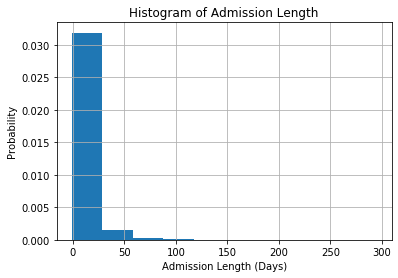

In [14]:
df.AdmissionLengthDays.hist(density=True, label=True)
plt.xlabel('Admission Length (Days)')
plt.ylabel('Probability')
plt.title('Histogram of Admission Length')

Text(0.5, 1.0, 'Histogram of Admission Length on Log Scale')

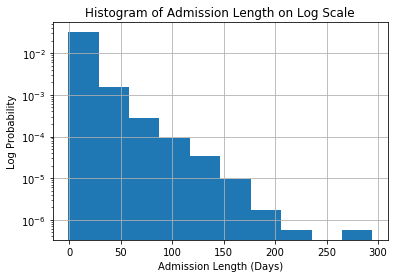

In [15]:
df.AdmissionLengthDays.hist(density=True, label=True, log=True)
plt.xlabel('Admission Length (Days)')
plt.ylabel('Log Probability')
plt.title('Histogram of Admission Length on Log Scale')

In [16]:
print(df.groupby('Death_1').mean())

                   ID  AdmissionLengthDays  EnglishLanguage_1  Married_1
Death_1                                                                 
0        29484.310219            10.140012           0.576748   0.406765
1        29724.728811            10.129606           0.519651   0.446001


Text(0.5, 0, 'Death Status (1 = Died)')

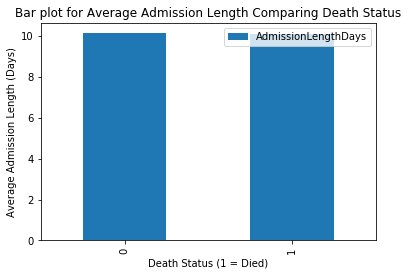

In [17]:
df.groupby('Death_1').mean().plot.bar(y='AdmissionLengthDays')
plt.title('Bar plot for Average Admission Length Comparing Death Status')
plt.ylabel('Average Admission Length (Days)')
plt.xlabel('Death Status (1 = Died)')

In [18]:
# describe the association between death and insurance type
death_insurance = pd.crosstab(df.Death_1, df.Insurance_Type)
print(death_insurance)

Insurance_Type  government  medicaid  medicare  private  self pay
Death_1                                                          
0                     1691      5400     24253    21152       515
1                       90       381      3904     1382        95


Text(0, 0.5, 'Counts for each insurance type')

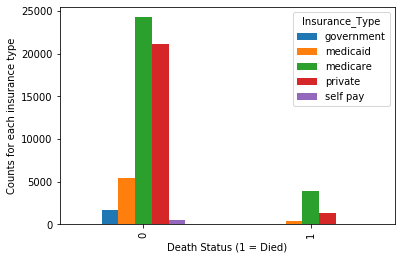

In [19]:
death_insurance.plot.bar()
plt.xlabel('Death Status (1 = Died)')
plt.ylabel('Counts for each insurance type')

In [21]:
from scipy import stats
stats.chi2_contingency(death_insurance)

(990.8535593949656,
 3.425615316200906e-213,
 4,
 array([[ 1603.93780473,  5206.26864074, 25357.70733738, 20293.73076466,
           549.35545249],
        [  177.06219527,   574.73135926,  2799.29266262,  2240.26923534,
            60.64454751]]))